In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine


user = 'postgres'
password ='admin123'
host = 'localhost'            
port = '5432'
database = 'test'
table_name = "agri_data_cleaned"      


engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")
query = "SELECT * FROM agri_data_cleaned"
df = pd.read_sql(query, con=engine)




In [16]:
# 1.Top 7 Rice Producing States (Bar Plot)
rice_states = df.groupby("state_name")["rice_production_1000_tons"].sum().nlargest(7).reset_index()
fig1 = px.bar(rice_states, x="state_name", y="rice_production_1000_tons", title="Top 7 Rice Producing States")
fig1.show()

In [6]:
# 2. Top 5 Wheat Producing States (Bar)
wheat_states = df.groupby("state_name")["wheat_production_1000_tons"].sum().nlargest(5).reset_index()
fig2 = px.bar(wheat_states, x="state_name", y="wheat_production_1000_tons", title="Top 5 Wheat Producing States")
fig2.show()

In [7]:
# 3. Wheat Production % (Pie)
fig3 = px.pie(wheat_states, values="wheat_production_1000_tons", names="state_name", title="Wheat Production Share")
fig3.show()

<Axes: title={'center': 'Top 5 States in Oilseed Production'}, xlabel='state_name'>

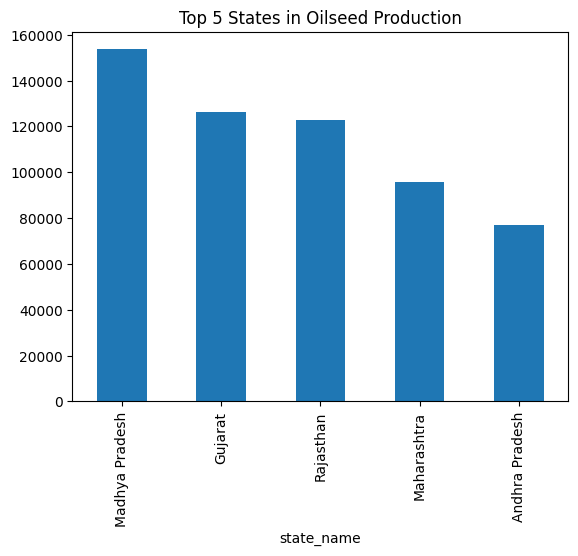

In [9]:
# 4.Top 5 Oilseed Producing States
top_oilseed = df.groupby("state_name")["oilseeds_production_1000_tons"].sum().nlargest(5)
top_oilseed.plot(kind="bar", title="Top 5 States in Oilseed Production")


In [10]:
# 5.Top 7 Sunflower Producing States (Bar Plot)
sunflower_states = df.groupby("state_name")["sunflower_production_1000_tons"].sum().nlargest(7).reset_index()
fig5 = px.bar(sunflower_states, x="state_name", y="sunflower_production_1000_tons", title="Top 7 Sunflower Producing States")
fig5.show()

In [11]:
# 6.India's Sugarcane Production Over Last 50 Years (Line Plot)
sugarcane_trend = df.groupby("year")["sugarcane_production_1000_tons"].sum().reset_index()
fig6 = px.line(sugarcane_trend, x="year", y="sugarcane_production_1000_tons", title="India's Sugarcane Production (Last 50 Years)")
fig6.show()

In [12]:
# 7.Rice vs. Wheat Production (Last 50 Years) – Line Chart
rice_wheat = df.groupby("year")[["rice_production_1000_tons", "wheat_production_1000_tons"]].sum().reset_index()
fig7 = px.line(rice_wheat, x="year", y=["rice_production_1000_tons", "wheat_production_1000_tons"], title="Rice vs Wheat Production Over 50 Years")
fig7.show()

In [13]:
# 8.Rice Production by Districts in West Bengal (Bar Plot)
wb_districts = df[df.state_name == "West Bengal"].groupby("dist_name")["rice_production_1000_tons"].sum().nlargest(10).reset_index()
fig8 = px.bar(wb_districts, x="dist_name", y="rice_production_1000_tons", title="Top Rice Producing Districts in West Bengal")
fig8.show()

In [14]:
# 9.Top 10 Wheat Production Years in Uttar Pradesh (Bar Chart)

up_wheat = df[df.state_name == "Uttar Pradesh"].groupby("year")["wheat_production_1000_tons"].sum().nlargest(10).reset_index()
fig9 = px.bar(up_wheat, x="year", y="wheat_production_1000_tons", title="Top 10 Wheat Production Years in UP")
fig9.show()

<Axes: title={'center': ' Pearl Millet vs Finger Millet Production Over 50 Years'}, xlabel='year'>

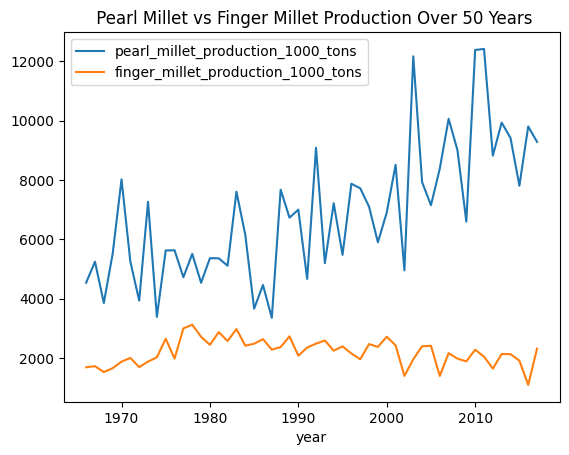

In [18]:
# 10. Millet Production Over the Last 50 Years (Line Plot)
df.groupby("year")[["pearl_millet_production_1000_tons", "finger_millet_production_1000_tons"]].sum().plot(
    kind="line",
    title=" Pearl Millet vs Finger Millet Production Over 50 Years"
)


In [ ]:
# 11.Rice vs Wheat Yield Across States (Bar Chart)

yields = df.groupby("state_name")[["rice_yield_kg_per_ha", "wheat_yield_kg_per_ha"]].mean().reset_index()
fig12 = px.bar(yields, x="state_name", y=["rice_yield_kg_per_ha", "wheat_yield_kg_per_ha"], barmode="group",
               title="Rice vs Wheat Yield Across States")
fig12.show()

<Axes: title={'center': ' Top 7 Groundnut Producing States'}, xlabel='state_name'>

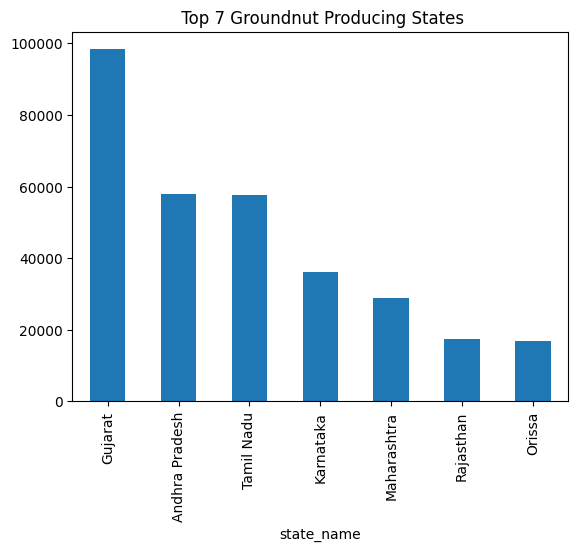

In [20]:
# 12.Groundnut Production by Top 7 States (Bar Plot)
df.groupby("state_name")["groundnut_production_1000_tons"].sum().nlargest(7).plot(kind="bar", title=" Top 7 Groundnut Producing States")


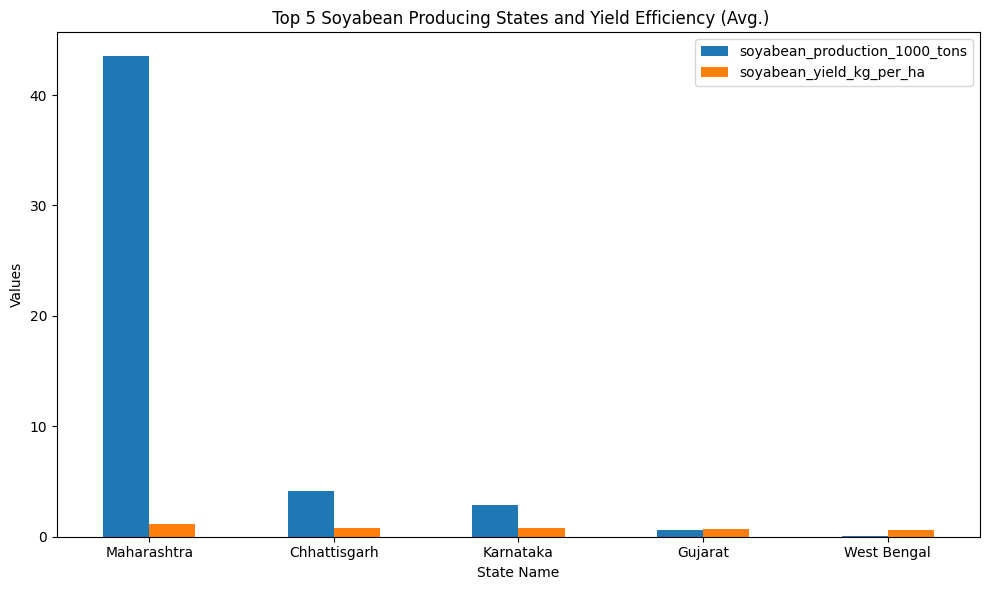

In [34]:
# 13.Soybean Production by Top 5 States and Yield Efficiency

df["soyabean_yield_kg_per_ha"] = (
    (df["soyabean_production_1000_tons"] * 1000) /
    (df["soyabean_area_1000_ha"] * 1000)
)

avg_soyabean = df.groupby("state_name")[[
    "soyabean_production_1000_tons",
    "soyabean_yield_kg_per_ha"
]].mean()

top5_soyabean = (
    avg_soyabean
    .replace([np.inf, -np.inf], np.nan)
    .dropna(subset=["soyabean_production_1000_tons", "soyabean_yield_kg_per_ha"])
    .nlargest(5, "soyabean_production_1000_tons")
)

ax = top5_soyabean.plot(
    kind="bar",
    title=" Top 5 Soyabean Producing States and Yield Efficiency (Avg.)",
    figsize=(10, 6),
    rot=0
)

ax.set_ylabel("Values")
ax.set_xlabel("State Name")
plt.tight_layout()
plt.show()


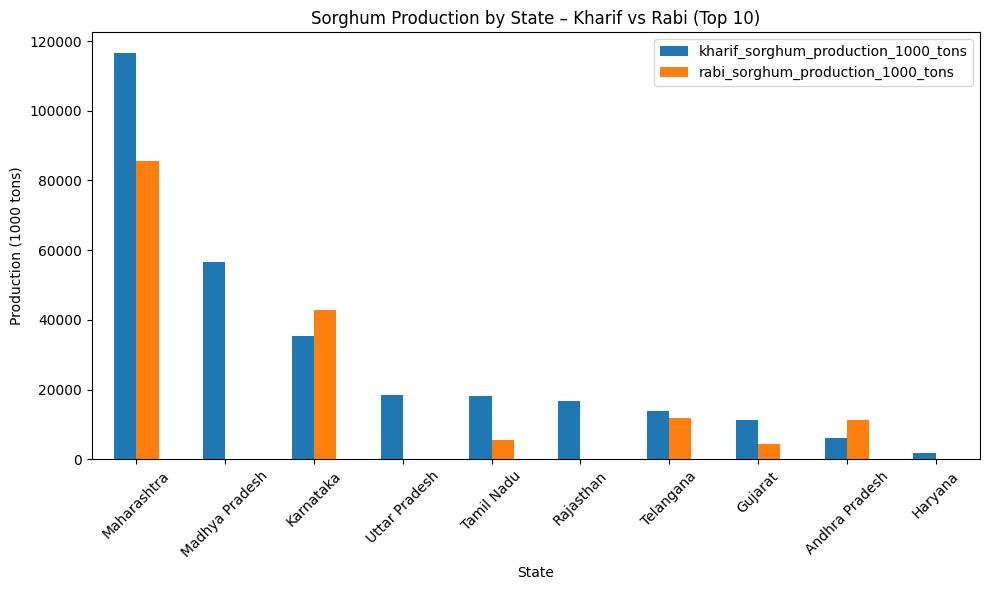

In [ ]:
#14. Top 10 Sorghum Production (Kharif and Rabi) by Region

sorghum_summary = df.groupby("state_name")[[
    "kharif_sorghum_production_1000_tons",
    "rabi_sorghum_production_1000_tons"
]].sum().sort_values(by="kharif_sorghum_production_1000_tons", ascending=False)

ax = sorghum_summary.head(10).plot(
    kind="bar",
    figsize=(10, 6),
    title="Sorghum Production by State – Kharif vs Rabi (Top 10)",
    rot=45
)

ax.set_ylabel("Production (1000 tons)")
ax.set_xlabel("State")
plt.tight_layout()
plt.show()


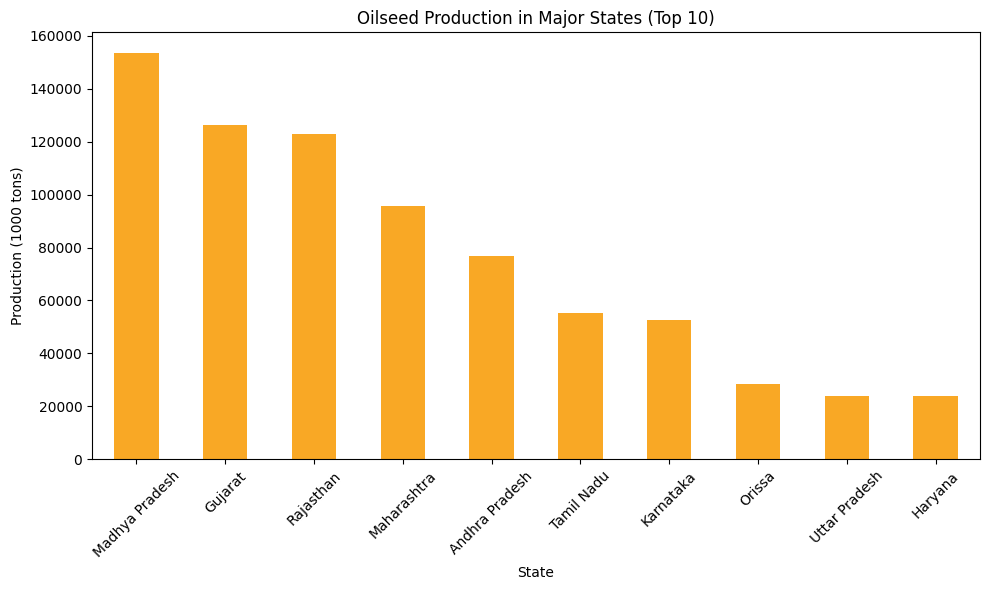

In [ ]:
# 15. Oilseed Production in Major States
oilseed_by_state = (
    df.groupby("state_name")["oilseeds_production_1000_tons"]
    .sum()
    .sort_values(ascending=False)
)


top_oilseed_states = oilseed_by_state.head(10)


ax = top_oilseed_states.plot(
    kind="bar",
    figsize=(10, 6),
    title="Oilseed Production in Major States (Top 10)",
    color="#f9a825",
    rot=45
)

ax.set_ylabel("Production (1000 tons)")
ax.set_xlabel("State")
plt.tight_layout()
plt.show()


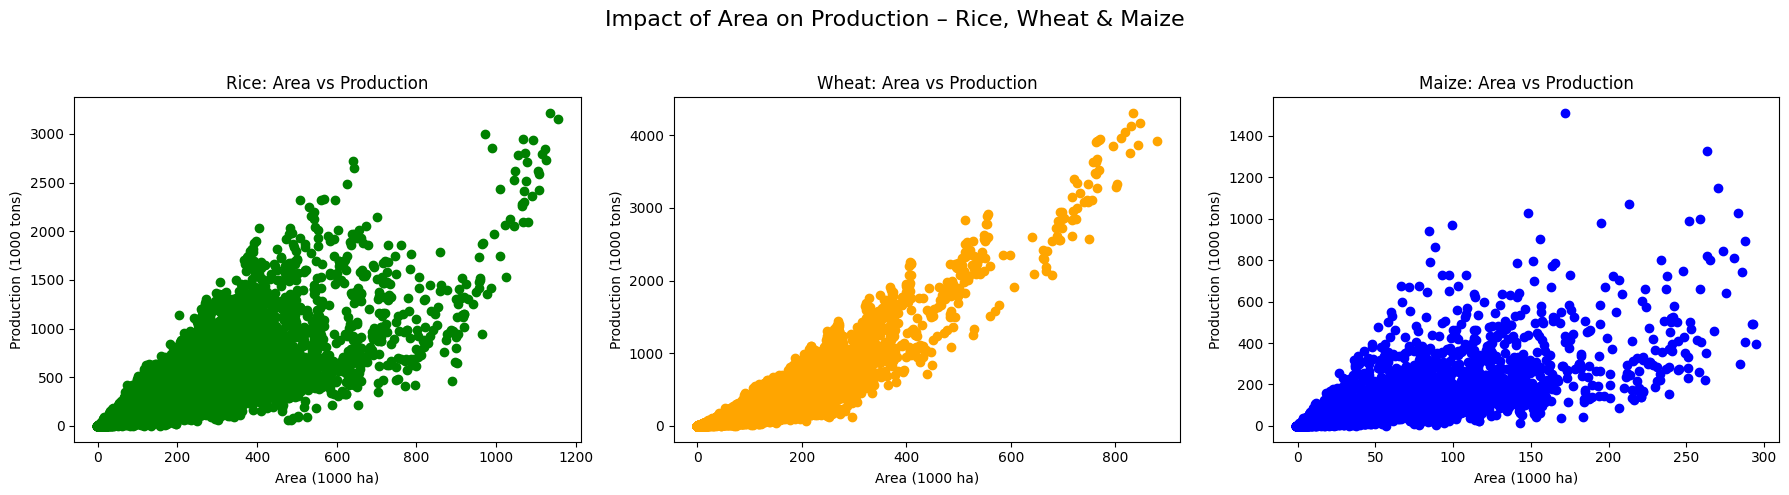

In [44]:
#16.Impact of Area Cultivated on Production (Rice, Wheat, Maize)
plt.figure(figsize=(18, 5))

# 🌾 RICE - Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(df["rice_area_1000_ha"], df["rice_production_1000_tons"], color="green")
plt.title("Rice: Area vs Production")
plt.xlabel("Area (1000 ha)")
plt.ylabel("Production (1000 tons)")

# 🌾 WHEAT - Scatter plot
plt.subplot(1, 3, 2)
plt.scatter(df["wheat_area_1000_ha"], df["wheat_production_1000_tons"], color="orange")
plt.title("Wheat: Area vs Production")
plt.xlabel("Area (1000 ha)")
plt.ylabel("Production (1000 tons)")

# 🌽 MAIZE - Scatter plot
plt.subplot(1, 3, 3)
plt.scatter(df["maize_area_1000_ha"], df["maize_production_1000_tons"], color="blue")
plt.title("Maize: Area vs Production")
plt.xlabel("Area (1000 ha)")
plt.ylabel("Production (1000 tons)")

# 🖼️ Final adjustments
plt.suptitle("Impact of Area on Production – Rice, Wheat & Maize", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
